In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("C:\\Users\\andre\\Documents\\datasets\\train.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Can handle just being passed a Pandas Dataframe directly.
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [7]:
data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev / 255.

In [8]:
data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.

In [23]:
# initialize the parameters
def init_params():
    w1 = np.random.randn(10, 784) * np.sqrt(1/784)
    b1 = np.random.randn(10, 1)
    w2 = np.random.randn(10, 10) * np.sqrt(1/10)
    b2 = np.random.randn(10, 1)
    return w1, b1, w2, b2

In [24]:
def relu(z):
    return np.maximum(z, 0)

def swish(z):
    return z * sigmoid(z)

def sigmoid(z):
    return 1 / (1+np.exp(-z))

def softmax(z):
    return np.exp(z) / sum(np.exp(z))

def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [25]:
def deriv_relu(z):
    return z > 0

def deriv_swish(z):
    return sigmoid(z) + z * sigmoid(z) * (1-sigmoid(z))

def backprop(z1, a1, z2, a2, w2, x, y):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_swish(z1) #Like applying weights in reverse
    dw1 = 1 / m * dz1.dot(x.T) # Remember the derivation of dz1/dw1 is just the activation of last layer, or the input in this case.
    db1 = 1 / m * np.sum(dz1) #1 represents the column wise sum.
    return dw1, db1, dw2, db2

In [26]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [27]:
def get_predictions(a2):
    # Fine to use argmax as it returns the index, class label and index are the same.
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backprop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(a2), y))
    return w1, b1, w2, b2

In [28]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 500, .1)

Iteration:  0
[9 9 9 ... 9 9 9] [2 9 7 ... 6 8 4]
Accuracy:  0.09888135593220339
Iteration:  50
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.5990338983050848
Iteration:  100
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.7655254237288136
Iteration:  150
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.8254067796610169
Iteration:  200
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.8511694915254238
Iteration:  250
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.8669830508474576
Iteration:  300
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.8772881355932204
Iteration:  350
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.8843898305084745
Iteration:  400
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.8901694915254237
Iteration:  450
[2 9 7 ... 6 8 4] [2 9 7 ... 6 8 4]
Accuracy:  0.8944745762711864


In [29]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

In [30]:
def test_predictions(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    #print(current_image)
    prediction = make_predictions(current_image, w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()


Prediction:  [1]
Label:  1


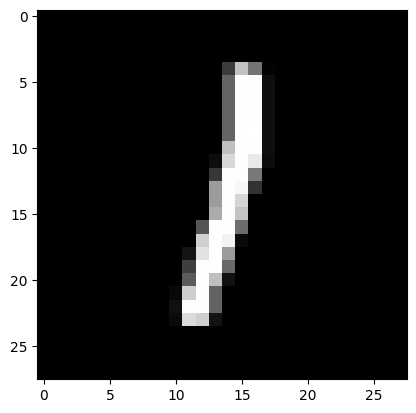

In [31]:
test_predictions(11025, w1, b1, w2, b2)

In [32]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, y_dev)

[3 1 3 5 1 2 0 6 7 5 0 1 7 8 0 9 0 6 0 1 4 2 0 2 8 4 5 0 4 3 9 8 2 0 7 9 8
 9 8 7 2 7 5 5 4 9 9 2 4 7 2 6 5 4 9 9 1 9 7 6 1 6 6 7 9 1 5 1 6 7 2 0 9 4
 1 4 4 3 4 8 8 5 9 9 3 1 4 7 9 0 0 9 9 4 7 5 3 7 1 2 3 6 6 1 3 4 7 5 4 7 9
 9 7 1 1 3 2 6 6 7 4 7 1 2 6 7 5 5 7 3 8 2 6 2 0 3 5 4 7 7 2 9 8 1 7 1 3 2
 0 0 7 8 0 3 1 0 5 1 8 6 7 7 3 5 0 2 6 2 0 8 2 2 5 8 2 6 7 7 1 9 1 0 1 5 3
 7 2 9 6 9 5 8 1 2 5 9 2 9 6 8 2 7 0 1 7 9 8 7 9 3 2 1 4 9 0 2 9 6 8 1 5 4
 1 3 1 6 6 9 1 9 9 6 8 6 0 3 7 8 8 0 4 6 6 9 6 7 0 2 3 9 0 2 6 3 0 3 2 0 7
 5 6 6 4 0 4 7 8 3 5 8 3 5 4 3 0 2 1 2 0 3 5 3 7 3 9 6 4 8 4 4 5 0 7 9 8 1
 0 8 7 0 8 5 7 7 8 9 3 5 6 2 3 5 4 2 3 7 4 8 3 2 9 7 7 8 7 8 8 8 0 4 2 9 3
 8 4 3 0 1 8 6 7 3 6 8 9 6 5 9 2 1 6 2 7 0 4 1 4 5 2 4 0 5 9 4 8 2 0 9 1 7
 7 5 6 3 0 7 9 0 4 6 6 1 7 6 9 0 1 6 3 2 7 3 4 1 9 9 4 0 8 0 6 2 1 4 1 4 8
 0 3 9 7 2 3 5 9 2 4 0 8 6 5 9 6 0 8 4 9 4 1 9 7 1 0 6 2 6 2 2 2 2 9 7 5 1
 4 8 9 2 6 6 9 4 1 8 1 0 6 9 3 2 0 6 1 7 6 4 4 3 1 7 7 2 8 9 3 0 8 8 8 8 8
 6 4 8 8 1 8 1 2 6 5 3 3 

0.896